# Sales Data Analysis


## Introduction
This project aims to analyze historical sales data to identify trends and patterns, forecast future sales, and provide insights for business decision-making. The analysis includes data cleaning, exploratory data analysis (EDA), and time series forecasting.

### Objectives
1. Load and clean the sales data.
2. Perform exploratory data analysis to uncover trends and patterns.
3. Forecast future sales using a time series model.
4. Export the results for further use.


In [ ]:
import pandas as pd

In [ ]:
sales_data= pd.read_csv("/content/sales_data_sample.csv",encoding = "latin1")

In [ ]:
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


Checking for null values

In [ ]:
sales_data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
# Drop columns with many missing values
sales_data.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'],inplace=True)


# Fill missing values in 'POSTALCODE' with a placeholder (e.g., 0)

sales_data['POSTALCODE'].fillna(0,inplace=True)

In [ ]:
# Convert 'ORDERDATE' to datetime

sales_data['ORDERDATE']=pd.to_datetime(sales_data['ORDERDATE'])

In [ ]:
print(sales_data.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   
std       92.085478         9.741443    20.174277         4.225841   

              SALES                      ORDERDATE       QTR_ID     MONTH_ID  \
count   2823.000000                           2823  2823.000000  2823.000000   
mean    3553.889072  2004-05-11 00:16:49.989373056     2.717676     7.092455   
min      482.130000            2003-01-06 00:00:00     1.000000     1.000000   
25%     2203.430000            2003-11-06 12:00:0

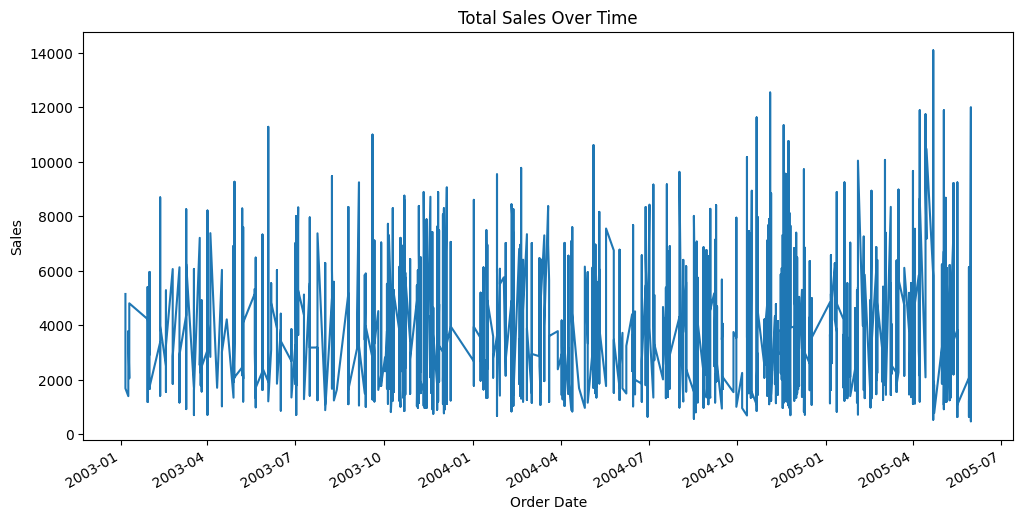

In [ ]:
import matplotlib.pyplot as plt

# Time series plot of total sales
sales_data.set_index('ORDERDATE')['SALES'].plot(figsize=(12,6))
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

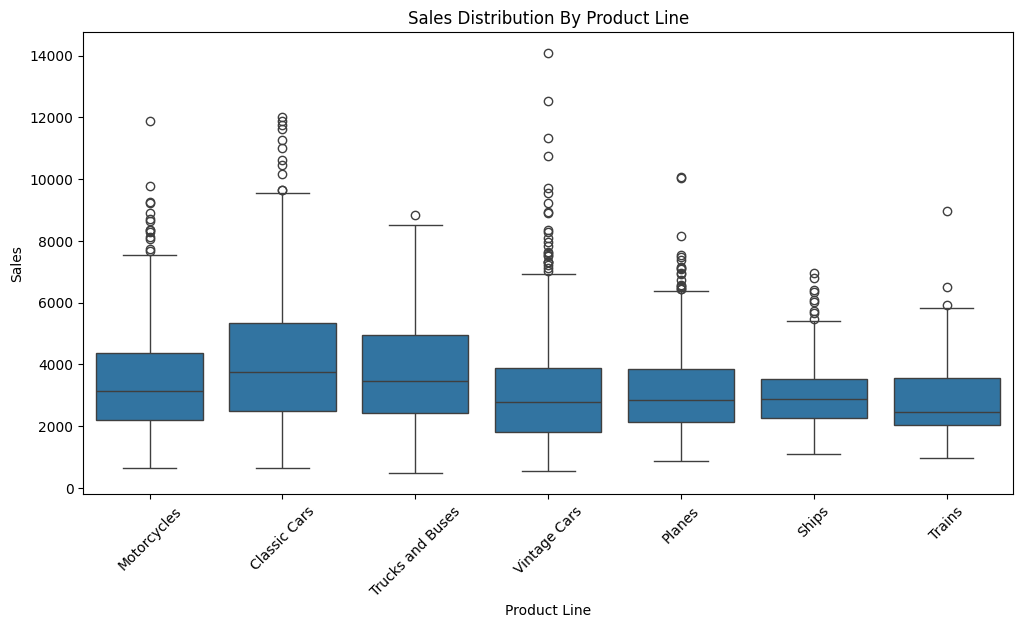

In [ ]:
import seaborn as sns

#Sales distribution by product line

plt.figure(figsize=(12,6))
sns.boxplot(x='PRODUCTLINE',y='SALES',data=sales_data)
plt.title('Sales Distribution By Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#resampling data by month

monthly_sales = sales_data.set_index('ORDERDATE').resample('M')['SALES'].sum()

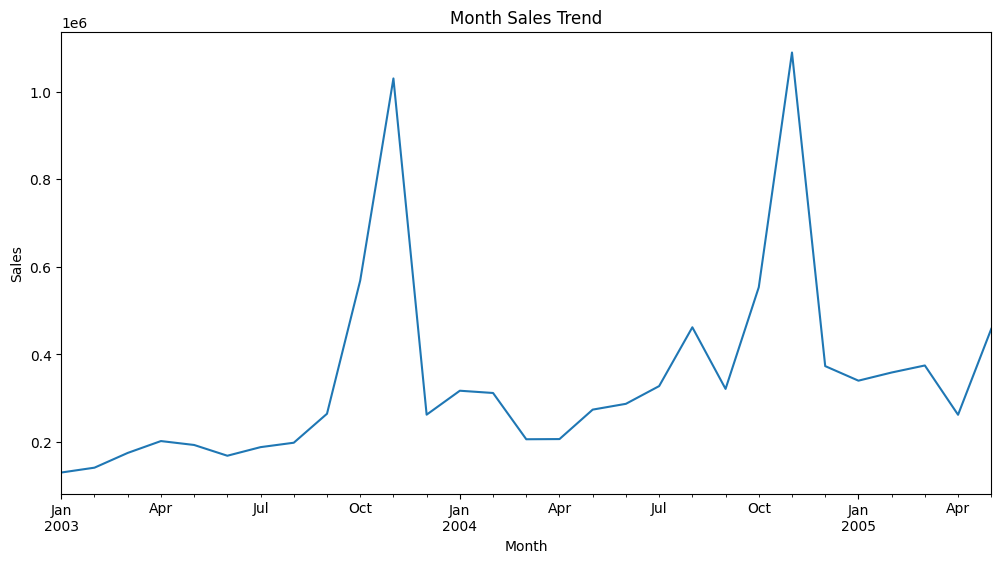

In [ ]:
#plot monthly sales

plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Month Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Time series Analysis and forecasting

<function matplotlib.pyplot.show(close=None, block=None)>

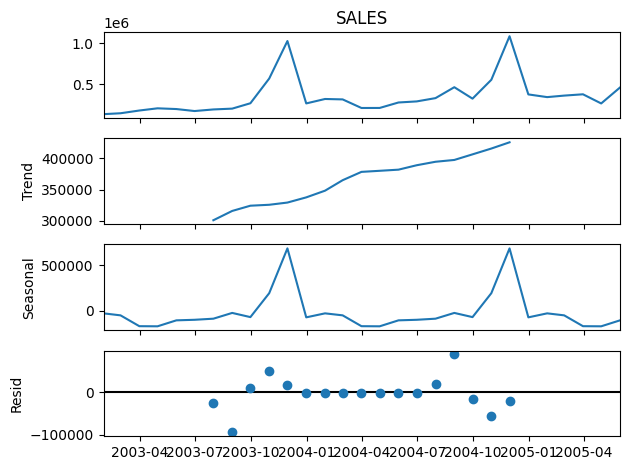

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales)
decomposition.plot()
plt.show

APPLYING FORECASTING MODELS

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#fit arima model
model = ARIMA(monthly_sales, order=(1,1,1))
results = model.fit()

In [ ]:
#Forecast future sales
forecast = results.get_forecast(steps=12)
forecast_index= pd.date_range(start=monthly_sales.index[-1],periods=12,freq='M')
forecast_values = forecast.predicted_mean

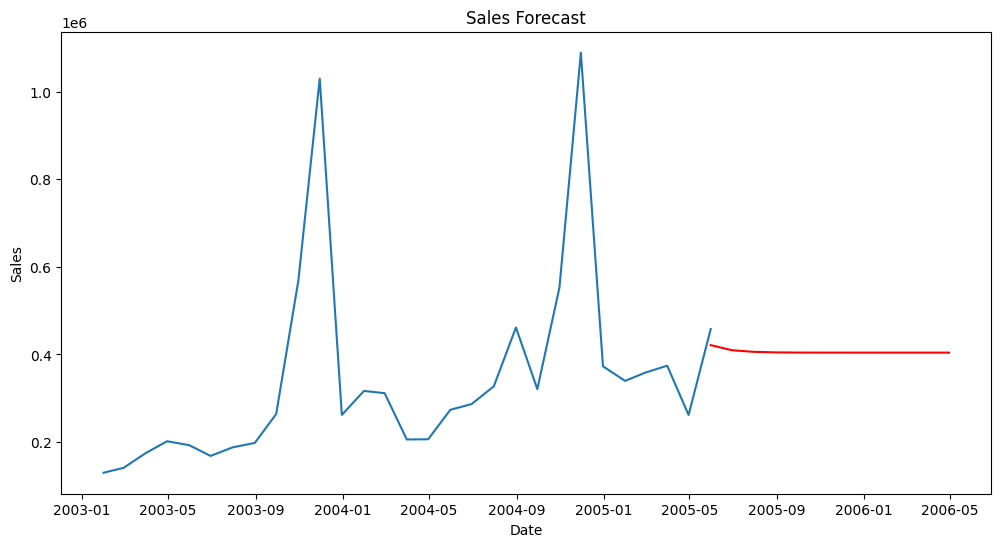

In [ ]:
#Plot forecast
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast_index, forecast_values,label='Forecast',color='red')
plt.legend
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -3.628783174623225
p-value: 0.005234006614207446


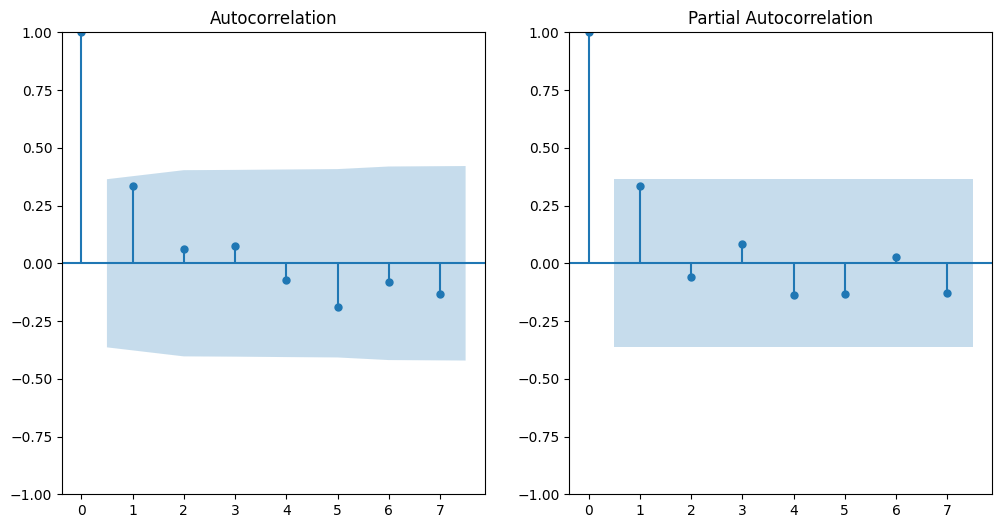

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Adjust the number of lags based on the length of the series
num_lags = 7

# Plot ACF and PACF with adjusted lags
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(monthly_sales, lags=num_lags, ax=plt.gca())
plt.subplot(122)
plot_pacf(monthly_sales, lags=num_lags, ax=plt.gca())
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model with determined parameters
sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Forecast future sales
sarima_forecast = sarima_results.get_forecast(steps=12)
sarima_forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')
sarima_forecast_values = sarima_forecast.predicted_mean

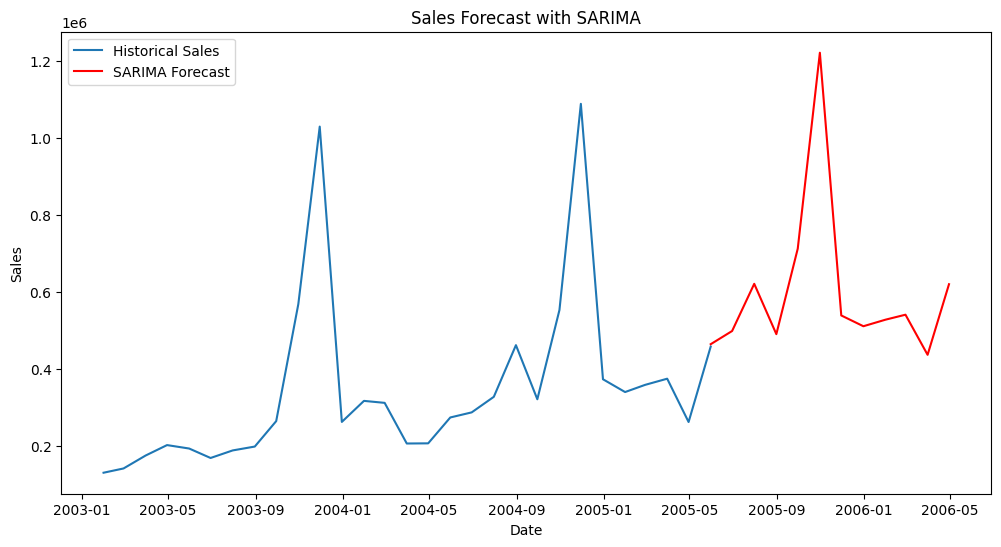

In [ ]:
# Plot SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(sarima_forecast_index, sarima_forecast_values, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

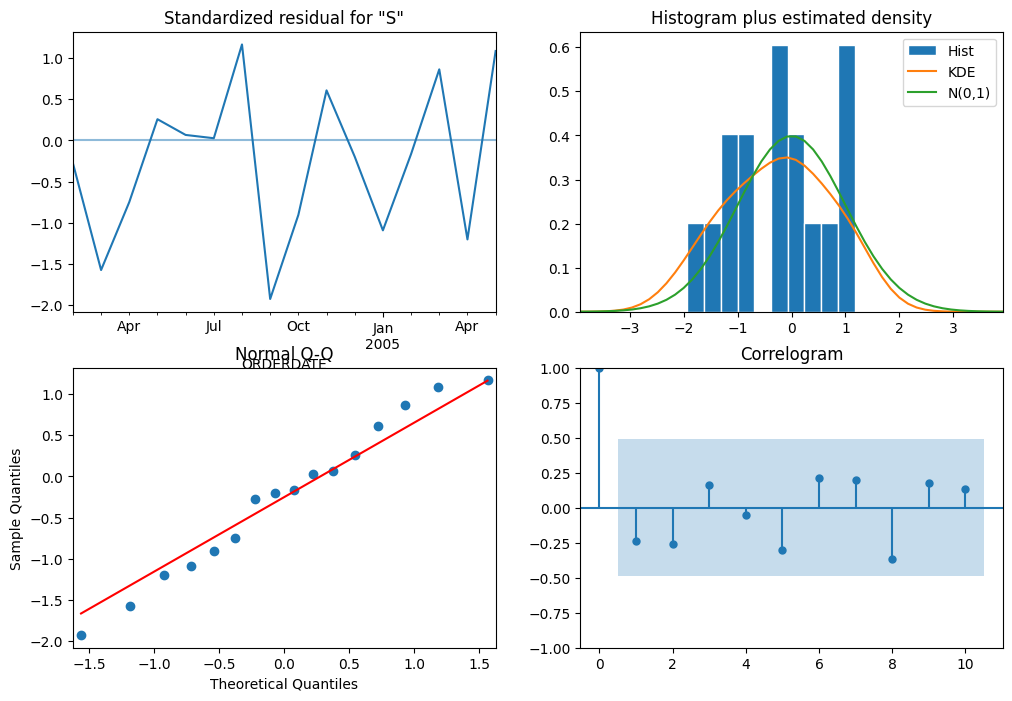

In [ ]:
# Plot diagnostics to check residuals
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()


In [ ]:
sales_data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [ ]:
forecasted_sales_data = pd.DataFrame({'ORDERDATE': forecast_index, 'SALES': forecast_values})

In [ ]:
# Total sales by product line
sales_by_product_line = sales_data.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Total sales by deal size
sales_by_deal_size = sales_data.groupby('DEALSIZE')['SALES'].sum().reset_index()

# Total sales by country (as an alternative to region)
sales_by_country = sales_data.groupby('COUNTRY')['SALES'].sum().reset_index()


In [ ]:
sales_data = sales_data[['ORDERDATE', 'SALES', 'PRODUCTLINE', 'DEALSIZE', 'COUNTRY']]

In [ ]:
sales_data.head()

,ORDERDATE,SALES,PRODUCTLINE,DEALSIZE,COUNTRY
0,2003-02-24,2871.00,Motorcycles,Small,USA
1,2003-05-07,2765.90,Motorcycles,Small,France
2,2003-07-01,3884.34,Motorcycles,Medium,France
3,2003-08-25,3746.70,Motorcycles,Medium,USA
4,2003-10-10,5205.27,Motorcycles,Medium,USA


In [ ]:
# Export historical sales data
sales_data.to_csv('historical_sales_data.csv', index=False)

# Export forecasted sales data
forecasted_sales_data.to_csv('forecasted_sales_data.csv', index=False)

# Export additional metrics
sales_by_product_line.to_csv('sales_by_product_line.csv', index=False)
sales_by_deal_size.to_csv('sales_by_deal_size.csv', index=False)
sales_by_country.to_csv('sales_by_country.csv', index=False)



## Conclusion
This analysis provided insights into historical sales data and forecasted future sales using time series modeling. Key findings include:
- Trends and patterns in sales over time.
- Sales distribution by product line, deal size, and country.
- Forecasted sales for the next 12 months.

These insights can help inform business decisions and strategy.
